<a href="https://colab.research.google.com/github/SilverSurferClash/Binary_classification/blob/main/Import_clean_SFDC_script_March_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Mounted at /content/drive


In [2]:
#!pip freeze > requirements.txt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#plt.style.use('dark_background')
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 2)
#Use option to round floats to two decimals
#pd.set_option('display.float_format',  '{:,.2f}'.format)
# Use option to display $ dollars
#pd.set_option('display.float_format', '${:.2f}'.format)
sns.set_style("ticks")
# Plotting pretty figures and avoid blurry images
#%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
#sns.set_context('notebook')


# Enable multiple cell outputs
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')              


In [4]:
os.getcwd()

'/content'

In [5]:
os.chdir("/content/drive/MyDrive/Colab_Notebooks/March_2023/Data")

#### Helper function

In [6]:
#Create a function that use the second element if the list has a length of 2 other return unknown

def clean_up_account(list_of_names):

  if len(list_of_names) > 1:
    return list_of_names[1]
  else:
    return list_of_names[0]





In [7]:
#Create a function to clean up the Billing type feature


Import helper data

In [8]:
#Import lookup table for countries
lookup_countries = pd.read_excel("./lookup.xlsx", sheet_name = 0)
#Import the data from SFDC as a excel file
#import_sfdc = pd.read_excel("./Prospective.xlsx", sheet_name = 0, 
                            #skiprows = 10)

import_sfdc = pd.read_excel("sfdc_march_3rd.xlsx", sheet_name = 0, skiprows = 9)
#Create dictionairy for maping the lookup value
country_dict = dict(zip(lookup_countries["Reporting_Country_short"], lookup_countries["Account_Reporting_Country"]))
#Import lookup table for countries
lookup_type = pd.read_excel("./lookup.xlsx", sheet_name = "Type")
#Create dictionairy for maping the lookup values for LIMS ID
type_dict = dict(zip(lookup_type["LIMS Project ID"], lookup_type["Type"]))
#Dictionaire for AE support countries 
AE_dict = { 'CANADA': "AE", "SPAIN" : "AE", "UNITED KINGDOM" : "AE", "BRAZIL" : "AE", "TURKEY" : "AE", "IRELAND" : "AE"}
#Import lookup Cancer Type
lookup_cancer_type = pd.read_excel("./lookup.xlsx", sheet_name = "Cancer_type")
cancer_type_dict = dict(zip(lookup_cancer_type["Old"], lookup_cancer_type["New"]))
#Map the countries to the sub-regions
subregion_dict = dict(zip(lookup_countries["Account_Reporting_Country"], lookup_countries["Sub_region"]))
#Import the currency data
lookup_currency = pd.read_excel("./lookup.xlsx", sheet_name = "Currency", parse_dates= ["Month"]).set_index("Month")
lookup_currency["EUR"] = lookup_currency["EUR"]/1000000
lookup_currency["GBP"] = lookup_currency["GBP"]/1000000
lookup_currency["USD"] = 1

#Import the currency type
lookup_currency_type =  pd.read_excel("./lookup.xlsx", sheet_name = "curr_look")
#Inport lookun Billing_type - Needs further work
#lookup_billing_type = pd.read_excel("./lookup.xlsx", sheet_name = "Billing_type")
#billing_type_dict = dict(zip(lookup_billing_type["Billing Type"], lookup_billing_type["Billing Type.1"]))
euaa_country_list = list(country_dict.values())



In [9]:
#euaa_country_list

In [10]:
#country_dict

In [11]:
#type_dict

In [12]:
### Identify the unique LIMS IDs

In [13]:
#a = list(set(import_sfdc["LIMS Project ID"]))

In [14]:
b = set(type_dict.keys())

In [15]:
#list(set(a)-set(b))

In [16]:
curr_dict = dict(zip(lookup_currency_type["Account_Reporting_Country"], lookup_currency_type["Currency"]))

#curr_dict

In [17]:

print(f"the currency rate is {lookup_currency.iloc[1,0]}")
#lookup_currency.head(3)

the currency rate is 1.123847


In [18]:
#Identify which LIMS id are not in the lookup
unique_LIMS_id = list(set(import_sfdc["LIMS Project ID"]))
unique_lookup_id = list(set(lookup_type["LIMS Project ID"]))
#list(set(unique_LIMS_id) - set(unique_lookup_id ))

In [19]:
#country_dict

In [20]:
#cancer_type_dict 

#### Import and clean up the data from SFDC

In [21]:
import_sfdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34332 entries, 0 to 34331
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  0 non-null      float64
 1   Accession #                 34332 non-null  object 
 2   Unnamed: 2                  0 non-null      float64
 3   Reporting Country           34325 non-null  object 
 4   Account: Reporting Country  33864 non-null  object 
 5   Billing Type                34300 non-null  object 
 6   Account: Account Name       34325 non-null  object 
 7   Contact: Full Name          34332 non-null  object 
 8   Date Received               34332 non-null  object 
 9   Final Report Date           30276 non-null  object 
 10  Test Ordered                24179 non-null  object 
 11  Cancer Type                 33851 non-null  object 
 12  LIMS Project ID             34332 non-null  object 
dtypes: float64(2), object(11)
memor

In [22]:
import_sfdc.head()

,Unnamed: 0,Accession #,Unnamed: 2,Reporting Country,Account: Reporting Country,Billing Type,Account: Account Name,Contact: Full Name,Date Received,Final Report Date,Test Ordered,Cancer Type,LIMS Project ID
0,NaN,A0584400,NaN,ES,ES,Self-Pay Patient,Instituto de Investigacion Sanitaria INCLIVA,Noelia Tarazona Llavero,9/29/2022,10/15/2022,Guardant 360,Pancreatic ductal adenocarcinoma,GHI_19
1,NaN,A0577992,NaN,ES,ES,Self-Pay Patient,Instituto de Investigacion Sanitaria INCLIVA,Noelia Tarazona Llavero,9/16/2022,9/22/2022,Guardant 360,Esophageal adenocarcinoma,GHI_19
2,NaN,A0179868,NaN,FR,FR,Pharma : ROW,JNS_01 FR10002-Institut Bergonie,Sophie Cousin,7/8/2019,7/13/2019,NaN,Lung adenocarcinoma,JNS_01
3,NaN,A0603771,NaN,CA,CA,Pharma : US,AZN_33: The Ottawa Hospital,Paul Wheatley-Price,10/28/2022,11/16/2022,Guardant 360,Non-small cell lung carcinoma (NSCLC),AZN_33
4,NaN,A0625094,NaN,CA,CA,Pharma : US,AZN_33: The Ottawa Hospital,Paul Wheatley-Price,12/3/2022,12/9/2022,NaN,Non-small cell lung carcinoma (NSCLC),AZN_33


In [23]:
#Remove the first two columns
import_sfdc = import_sfdc.drop(["Unnamed: 0", "Unnamed: 2"], axis = 1)
#Drop the last five rows
import_sfdc = import_sfdc.iloc[0:-5]
#Cast Date Received to datetime object 
#import_sfdc["Date Received"] = pd.to_datetime(import_sfdc["Date Received"])
#Clean up the type column
import_sfdc["Type"] = import_sfdc["LIMS Project ID"].map(type_dict)
#Replace the two letter country code with the full country name
import_sfdc["Reporting Country"] = import_sfdc["Reporting Country"].map(country_dict)
#Clean up the cancer types and reduce number of categories
import_sfdc["Cancer Type"] = import_sfdc["Cancer Type"].map(cancer_type_dict)
#Clean up the Account column by removing all strings before the ":"
import_sfdc["Account: Account Name"] = import_sfdc["Account: Account Name"].fillna("Unknown")
import_sfdc["Account: Account Name"] = import_sfdc.loc[:, "Account: Account Name"].str.split(":").apply(clean_up_account)
#Clean up the Billing type column 
#import_sfdc["Billing Type"] = import_sfdc["Billing Type"].map(billing_type_dict)
#import_sfdc.tail(6)
# Set the date recieved as date index
#import_sfdc = import_sfdc.set_index("Date Received")
product_dict = {"GHI_10":"Reveal", "GHI_18": "Reveal2", "GHI_19" : "Guardant360 CDx", "GHI_01": "Guardant360 CDx", "GH2_12" : "G360/2.12" }
import_sfdc["Product"] = 1
#import_sfdc.info()

In [24]:
import_sfdc = import_sfdc[import_sfdc["Reporting Country"].isin(euaa_country_list)].copy()
import_sfdc.shape

(16532, 13)

In [25]:
#df[“column_name”] = np.where(df[“column_name”]==”some_value”, value_if_true, value_if_false)
import_sfdc["AE_supported"] = np.where(import_sfdc["Reporting Country"].isin(AE_dict.keys()), "AE", "non_AE")

#Add a column with the information about the currency based on the imported dictionairy
import_sfdc["Currency"] = import_sfdc["Reporting Country"].map(curr_dict)

In [26]:
import_sfdc["Sub_region"] = import_sfdc["Reporting Country"]
import_sfdc["Sub_region"] = import_sfdc["Sub_region"].map(subregion_dict)

In [27]:
import_sfdc["Date Received"] = pd.to_datetime(import_sfdc["Date Received"])
import_sfdc = import_sfdc.set_index("Date Received")

In [28]:
#Create date and time features

#Create a year, month, quarter variable
import_sfdc["Month"] = import_sfdc.index.month
import_sfdc["Year"] = import_sfdc.index.year
import_sfdc['Quarter'] = import_sfdc.index.quarter
#Other feature engineering based on feature analysis below
import_sfdc['Sales'] = 1

#create a Year Month columns
import_sfdc['Year_Month'] = import_sfdc.index.to_period('M')
#Cast the Year_Month column to a str
import_sfdc['Year_Month'] = import_sfdc['Year_Month'].astype(str)
import_sfdc['Year_Month'] = pd.to_datetime(import_sfdc['Year_Month'])
#Cast some features to categorical
#df['Reporting_Country'] = df['Reporting_Country'].astype('category')
import_sfdc["Type"] = import_sfdc['Type'].astype('category')
#Add a column to allow merging this datafarme with the currency_lookup
#import_sfdc["Month_to_match"] = f"{import_sfdc[["Year"]]}_{import_sfdc[["Month"]]}"
import_sfdc["Month_to_match"] = import_sfdc["Year"].astype("string") + "-" + import_sfdc["Month"].astype("string")

In [29]:
import_sfdc.index.min(),import_sfdc.index.max()

(Timestamp('2019-01-02 00:00:00'), Timestamp('2023-03-02 00:00:00'))

In [30]:
#import_sfdc["Reporting Country"].value_counts()

In [31]:
#import_sfdc.Type.value_counts()

In [32]:
import_sfdc.shape

(16532, 21)

In [33]:
#import_sfdc.info()

In [34]:
#import_sfdc["Billing Type"].value_counts()

In [35]:
#import_sfdc["Test Type"].value_counts()

In [36]:
#import_sfdc["Cancer Type"].value_counts()

In [37]:
#import_sfdc['Billing Type'].value_counts()

In [38]:
# Import the revenue data

revenue_import = pd.read_excel("./Sales_Volume_EUAA_Analytics_march_3rd.xlsx", skiprows = 28)
revenue_import = revenue_import.iloc[:, 1:12]
#revenue_import.columns.tolist()
revenue_import['Accession #']= revenue_import['Accession #'].fillna("missing") 
revenue_import = revenue_import[revenue_import['Accession #'].str.startswith("A0")]
#revenue_import.info()

In [39]:
#revenue_import.head()


In [40]:
#revenue_import.columns.tolist()

In [41]:
revenue_col_list = ['Accession #', 'Invoiced Ammount','Expected Amount $','Invoiced/In Prg.', 'FOC']

In [42]:
#Define the clean up function for the FOC columns
def foc_clean_up(value):

  if value == "x":
    return "Free"

  elif value == "x (COV19)":
     return "Free"
  elif value == "x (Christie)":
    return "Free"
  else: 
    return value

#Clean up Docuten

def docuten_clean_up(value):

  if value == "y (DOCUTEN)":
    return "Free"

  else: 
    return value

#Clean up the revenue data and extract the free of charge information
revenue_import_clean = revenue_import.loc[:, revenue_col_list].copy()
revenue_import_clean["FOC"] = revenue_import_clean["FOC"].fillna("Paid")
#revenue_import_clean.tail()

In [43]:
revenue_import_clean["FOC"].value_counts()

Paid            3401
x                798
x (COV19)         84
x (Christie)       6
                   1
Name: FOC, dtype: int64

In [44]:
revenue_import_clean["FOC"] = revenue_import_clean["FOC"].apply(foc_clean_up).astype("category")

In [45]:
revenue_import_clean["FOC"].value_counts()

Paid    3401
Free     888
           1
Name: FOC, dtype: int64

In [46]:
#Join the two dataframes

df_merged = import_sfdc.reset_index().merge(revenue_import_clean[["Accession #", "FOC", "Invoiced Ammount"]], how='inner', on = "Accession #").set_index("Date Received")
df_merged.sample(3)

,Accession #,Reporting Country,Account: Reporting Country,Billing Type,Account: Account Name,Contact: Full Name,Final Report Date,Test Ordered,Cancer Type,LIMS Project ID,Type,Product,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Year_Month,Month_to_match,FOC,Invoiced Ammount
Date Received,,,,,,,,,,,,,,,,,,,,,,,
2023-01-11,A0644723,MEXICO,MX,Distributors : ROW,ABC Hospital,Jesus Miguel Lazaro de Leon,1/26/2023,Guardant 360,Breast,GHI_01,Commercial,1,non_AE,EUR,Americas,1,2023,1,1,2023-01-01,2023-1,Paid,3228 USD
2020-04-30,A0251749,SPAIN,ES,Distributors : ROW,Hospital Clinico Provincial de Barcelona,Noemi Reguart,5/4/2020,Guardant 360,NaN,GHI_01,Commercial,1,AE,EUR,Europe,4,2020,2,1,2020-04-01,2020-4,Paid,2200.0
2022-05-02,A0507259,UNITED KINGDOM,GB,Self-Pay Patient,Guys Hospital,Debra Josephs,5/6/2022,Guardant 360,NaN,GHI_01,Commercial,1,AE,GBP,Europe,5,2022,2,1,2022-05-01,2022-5,Free,0 GBP


### Identify the unique LIMS ID

In [47]:
df_merged.shape

(3883, 23)

In [48]:
# Startinf dataframe for all years
#import_sfdc.info()

In [49]:
#Cleaned up dataframe included FOC information starting from around 2019
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3883 entries, 2022-09-29 to 2023-01-17
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Accession #                 3883 non-null   object        
 1   Reporting Country           3883 non-null   object        
 2   Account: Reporting Country  3883 non-null   object        
 3   Billing Type                3883 non-null   object        
 4   Account: Account Name       3883 non-null   object        
 5   Contact: Full Name          3883 non-null   object        
 6   Final Report Date           3857 non-null   object        
 7   Test Ordered                3721 non-null   object        
 8   Cancer Type                 1299 non-null   object        
 9   LIMS Project ID             3883 non-null   object        
 10  Type                        3880 non-null   category      
 11  Product                     3883 non-n

In [50]:
import_sfdc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16532 entries, 2022-09-29 to 2023-01-17
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Accession #                 16532 non-null  object        
 1   Reporting Country           16532 non-null  object        
 2   Account: Reporting Country  16532 non-null  object        
 3   Billing Type                16502 non-null  object        
 4   Account: Account Name       16532 non-null  object        
 5   Contact: Full Name          16532 non-null  object        
 6   Final Report Date           14829 non-null  object        
 7   Test Ordered                10771 non-null  object        
 8   Cancer Type                 6294 non-null   object        
 9   LIMS Project ID             16532 non-null  object        
 10  Type                        16422 non-null  category      
 11  Product                     16532 non

In [51]:
#Select the features for the analysis
import_sfdc.columns.to_list()
list_for_country_analysis = ['Accession #',
 'Reporting Country',
 'Cancer Type',
 'Sales',
 'Year_Month', "Sub_region", "AE_supported", "Currency", "Type", "Month", "Quarter", "Year", "LIMS Project ID"]

all_samples = import_sfdc.loc[:,list_for_country_analysis ]
all_samples = all_samples[all_samples["Reporting Country"].isin(euaa_country_list)]
#countries_df["Reporting Country"] = countries_df["Reporting Country"].astype('category')
all_samples.shape, all_samples.index.min(), all_samples.index.max()

((16532, 13),
 Timestamp('2019-01-02 00:00:00'),
 Timestamp('2023-03-02 00:00:00'))

In [52]:
all_samples.shape

(16532, 13)

In [53]:
# create a dataframe withh al countries and ssamples that can be used for indivudual time analysis horizons

countries_df = all_samples

In [54]:
#Starting df for plotting
all_samples.index.min(), all_samples.index.max()

(Timestamp('2019-01-02 00:00:00'), Timestamp('2023-03-02 00:00:00'))

# Select the time period for analysis in the # of countries to be analysed

In [55]:
all_samples.shape

(16532, 13)

In [56]:
#Select the time horizion to analyse
start_date = "2021-01-01"
end_date = "2023-02-28"
#Select the # of countries to be analyses based on the maxiumum number of samplesin 
#the time horizon

all_samples = all_samples.loc[start_date:end_date].copy()
print(f"The total number of samples in this dataframe is {all_samples.shape[0]}")

The total number of samples in this dataframe is 10175


In [57]:
all_samples.index.min(), all_samples.index.max()

(Timestamp('2021-01-02 00:00:00'), Timestamp('2023-02-28 00:00:00'))

In [58]:
#Merging the GH trials and LUNAR into ISTs

def merge_ISTs(x):
  if x == "GH Trials (Prospective)":
    return "ISTs"
  elif x == "Lunar":
    return "ISTs"
  else:
    return x

In [59]:
all_samples["Type"] = all_samples["Type"].map(merge_ISTs)
all_samples["Type"].value_counts()

Biopharma     4271
Commercial    2810
ISTs          1944
GAP           1132
Name: Type, dtype: int64

In [60]:
all_samples.head(1)

,Accession #,Reporting Country,Cancer Type,Sales,Year_Month,Sub_region,AE_supported,Currency,Type,Month,Quarter,Year,LIMS Project ID
Date Received,,,,,,,,,,,,,
2022-09-29,A0584400,SPAIN,NaN,1,2022-09-01,Europe,AE,EUR,Commercial,9,3,2022,GHI_19


In [61]:
#Total sales across the region
total_sales_regions = all_samples.groupby(['Year_Month']).sum().reset_index()

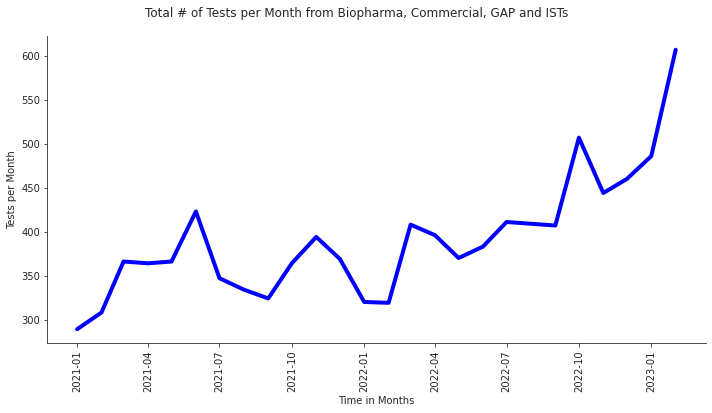

In [62]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = total_sales_regions, x = "Year_Month", y = "Sales", kind = "line", color = "blue", linewidth=4 ,height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Total # of Tests per Month from Biopharma, Commercial, GAP and ISTs', y=1.05)

#plt.savefig('total_sales.pdf', dpi = 300, bbox_inches ="tight",pad_inches = 1)
#files.download("total_sales.pdf")
plt.show()

In [63]:
#Calculate the annual growth rate
all_samples.groupby(['Year'])["Sales"].sum().reset_index()

,Year,Sales
0,2021,4248
1,2022,4834
2,2023,1093


In [64]:
all_samples_by_type = all_samples.groupby(['Year_Month', "Type"]).sum().reset_index()
all_samples_by_type.head(3)

,Year_Month,Type,Sales,Month,Quarter,Year
0,2021-01-01,Biopharma,59,59,59,119239
1,2021-01-01,Commercial,87,87,87,175827
2,2021-01-01,GAP,74,74,74,149554


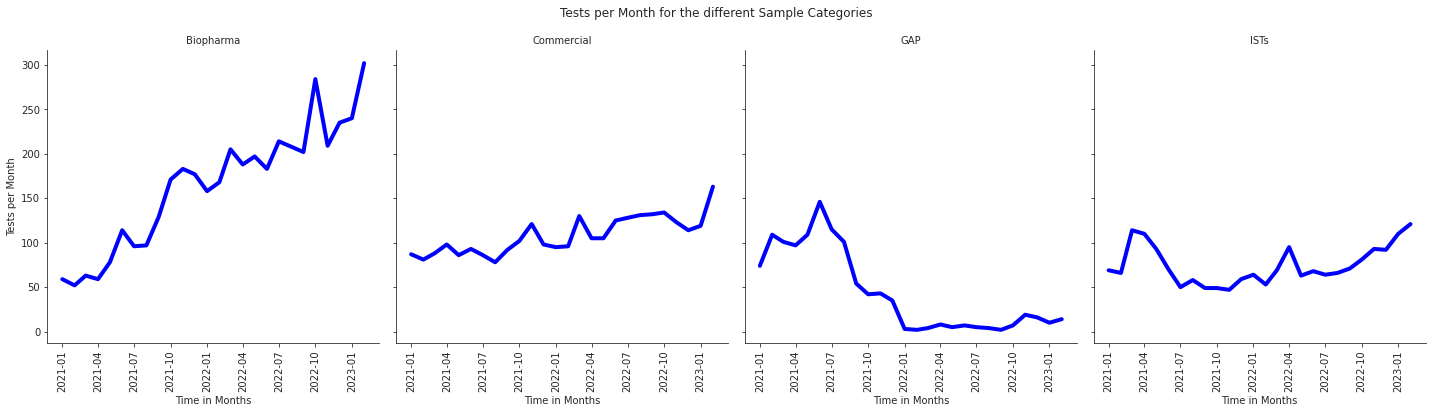

In [65]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = all_samples_by_type, x = "Year_Month", y = "Sales", kind = "line", col = "Type", color = "blue", linewidth=4 )
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Tests per Month for the different Sample Categories', y=1.05)

#plt.savefig("type_by_country.pdf", dpi = 300, bbox_inches ="tight",pad_inches = 1)
#files.download("type_by_country.pdf")
plt.show()

In [66]:
#Calculate the annual sample volume growth rate

comm_cases = all_samples[all_samples["Type"] == "Commercial"]
comm_cases.groupby("Year")["Sales"].sum()

Year
2021    1110
2022    1418
2023     282
Name: Sales, dtype: int64

In [67]:
#Create a dataframe with just the topx countries by number of tests sold
#top_x = countries_df.groupby('Reporting Country').sum().sort_values("Sales",ascending = False).head(num_countries)
##top_x_list = top_x.index.tolist()
#top_x_sales =countries_df[countries_df['Reporting Country'].isin(top_x_list)]
#print(f"The top {num_countries} countries have {top_x_sales.shape[0]} samples which represents {top_x_sales.shape[0]/countries_df.shape[0]:.2%}")

### Analyze the annual sample volume  and the annual growth rate by region and grouped by Type


In [68]:
all_samples.index.min(), all_samples.index.max()

(Timestamp('2021-01-02 00:00:00'), Timestamp('2023-02-28 00:00:00'))

In [69]:
all_samples.head()

,Accession #,Reporting Country,Cancer Type,Sales,Year_Month,Sub_region,AE_supported,Currency,Type,Month,Quarter,Year,LIMS Project ID
Date Received,,,,,,,,,,,,,
2022-09-29,A0584400,SPAIN,NaN,1,2022-09-01,Europe,AE,EUR,Commercial,9,3,2022,GHI_19
2022-09-16,A0577992,SPAIN,GI,1,2022-09-01,Europe,AE,EUR,Commercial,9,3,2022,GHI_19
2022-10-28,A0603771,CANADA,NaN,1,2022-10-01,Americas,AE,USD,Biopharma,10,4,2022,AZN_33
2022-12-03,A0625094,CANADA,NaN,1,2022-12-01,Americas,AE,USD,Biopharma,12,4,2022,AZN_33
2022-11-02,A0606045,CANADA,NaN,1,2022-11-01,Americas,AE,USD,Biopharma,11,4,2022,AZN_33


In [70]:
all_samples.groupby(["Year", "Type"])["Sales"].sum()

Year  Type      
2021  Biopharma     1278
      Commercial    1110
      GAP           1026
      ISTs           834
2022  Biopharma     2451
      Commercial    1418
      GAP             82
      ISTs           879
2023  Biopharma      542
      Commercial     282
      GAP             24
      ISTs           231
Name: Sales, dtype: int64

In [71]:
all_samples.groupby(["Year", "Year_Month", "Type"])["Sales"].sum()

Year  Year_Month  Type      
2021  2021-01-01  Biopharma      59
                  Commercial     87
                  GAP            74
                  ISTs           69
      2021-02-01  Biopharma      52
                               ... 
2023  2023-01-01  ISTs          110
      2023-02-01  Biopharma     302
                  Commercial    163
                  GAP            14
                  ISTs          121
Name: Sales, Length: 104, dtype: int64

In [72]:
all_samples.shape, all_samples.index.min(), all_samples.index.max()

((10175, 13),
 Timestamp('2021-01-02 00:00:00'),
 Timestamp('2023-02-28 00:00:00'))

# Analysing the breakdown of commercial samples

In [73]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3883 entries, 2022-09-29 to 2023-01-17
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Accession #                 3883 non-null   object        
 1   Reporting Country           3883 non-null   object        
 2   Account: Reporting Country  3883 non-null   object        
 3   Billing Type                3883 non-null   object        
 4   Account: Account Name       3883 non-null   object        
 5   Contact: Full Name          3883 non-null   object        
 6   Final Report Date           3857 non-null   object        
 7   Test Ordered                3721 non-null   object        
 8   Cancer Type                 1299 non-null   object        
 9   LIMS Project ID             3883 non-null   object        
 10  Type                        3880 non-null   category      
 11  Product                     3883 non-n

In [74]:
df_merged.index.min(), df_merged.index.max()

(Timestamp('2019-09-03 00:00:00'), Timestamp('2023-03-02 00:00:00'))

In [75]:
#Select the time horizion to analyse
start_date_com = "2021-01-01"
end_date_com = "2023-02-28"
#Select the # of countries to be analyses based on the maxiumum number of samplesin 
#the time horizon
num_countries_comm = 32
#The the Year_Month columns as index to allow for easier slicing

#Create the dataframe relevant for the time periode which should be analysed
df_merged_time_horizon = df_merged.loc[start_date_com:end_date_com].copy()
print(f"The total number of samples in this dataframe is {df_merged_time_horizon.shape[0]}")

The total number of samples in this dataframe is 2804


In [76]:
df_merged_time_horizon.index.max()

Timestamp('2023-02-28 00:00:00')

In [77]:
#identiy the top commercial countries
df_merged_time_horizon["FOC"] = df_merged_time_horizon["FOC"].astype("string")

#Create the dataframe relevant for the time periode which should be analysed

print(f"The total number of samples in this dataframe is {df_merged_time_horizon.shape[0]}")


The total number of samples in this dataframe is 2804


In [78]:
df_merged_time_horizon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2804 entries, 2022-09-29 to 2023-01-17
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Accession #                 2804 non-null   object        
 1   Reporting Country           2804 non-null   object        
 2   Account: Reporting Country  2804 non-null   object        
 3   Billing Type                2804 non-null   object        
 4   Account: Account Name       2804 non-null   object        
 5   Contact: Full Name          2804 non-null   object        
 6   Final Report Date           2789 non-null   object        
 7   Test Ordered                2804 non-null   object        
 8   Cancer Type                 910 non-null    object        
 9   LIMS Project ID             2804 non-null   object        
 10  Type                        2801 non-null   category      
 11  Product                     2804 non-n

In [79]:
all_samples.groupby(["Month", "Reporting Country"])["Sales"].sum()

Month  Reporting Country
1      ARGENTINA              1
       AUSTRIA                9
       BELGIUM               20
       BRAZIL                34
       CANADA                74
                           ... 
12     PORTUGAL               5
       SPAIN                166
       SWITZERLAND            3
       UKRAINE                4
       UNITED KINGDOM       203
Name: Sales, Length: 235, dtype: int64

In [80]:
#Create a dataframe with just the topx countries by number of tests sold
#top_comm_x = df_merged_time_horizon.groupby('Reporting Country').sum().sort_values("Sales",ascending = False).head(num_countries_comm)
#top_comm_x_list = top_comm_x.index.tolist()
#List of countries based on Ian's input
country_list = ['UNITED KINGDOM', 'SPAIN', 'BRAZIL', 'TURKEY', 'CANADA']
top_comm_x_sales =df_merged_time_horizon[df_merged_time_horizon['Reporting Country'].isin(country_list)]
print(f"The top 5 countries have {top_comm_x_sales.shape[0]} samples which represents {top_comm_x_sales.shape[0]/df_merged_time_horizon.shape[0]:.2%}")

The top 5 countries have 2497 samples which represents 89.05%


In [81]:
#top_comm_x_list

In [82]:
#merged_top_x_countries = df_merged[df_merged['Reporting Country'].isin(top_comm_x_list)]
#merged_top_x_countries["Reporting Country"].value_counts()

In [83]:
list_for_FOC_analysis = [
 'Reporting Country',
 'Type',
 'Sales', 'FOC',
 'Year_Month']

In [84]:
#Create the main data frame for the further analysis
commercial_sales_FOC_analysis_df = top_comm_x_sales[list_for_FOC_analysis]
commercial_sales_FOC_analysis_df["FOC"] = commercial_sales_FOC_analysis_df["FOC"].astype("category")

#This is the main dataframe
commercial_sales_FOC_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2497 entries, 2022-09-29 to 2023-01-17
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Reporting Country  2497 non-null   object        
 1   Type               2494 non-null   category      
 2   Sales              2497 non-null   int64         
 3   FOC                2497 non-null   category      
 4   Year_Month         2497 non-null   datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 83.2+ KB


In [85]:
commercial_sales_FOC_analysis_df["FOC"].value_counts()

Paid    1889
Free     608
Name: FOC, dtype: int64

In [86]:
FOC_df = commercial_sales_FOC_analysis_df.groupby(['Year_Month','Reporting Country', "FOC"])["Sales"].sum().reset_index()
#FOC_df.tail()


In [87]:
FOC_df

,Year_Month,Reporting Country,FOC,Sales
0,2021-01-01,BRAZIL,Free,0
1,2021-01-01,BRAZIL,Paid,6
2,2021-01-01,CANADA,Free,0
3,2021-01-01,CANADA,Paid,2
4,2021-01-01,SPAIN,Free,0
...,...,...,...,...
203,2023-02-01,CANADA,Paid,6
204,2023-02-01,SPAIN,Free,4
205,2023-02-01,SPAIN,Paid,15
206,2023-02-01,UNITED KINGDOM,Free,34


In [88]:
#start = "2022-01-01"
#end = "2022-12-31"
#var1 = df_merged_time_horizon.set_index("Year_Month")

#var2 = var1[start:end]
#var2[var2["Reporting Country"] == "UNITED KINGDOM"].head(50)

In [89]:
FOC_df["FOC"].shape

(208,)

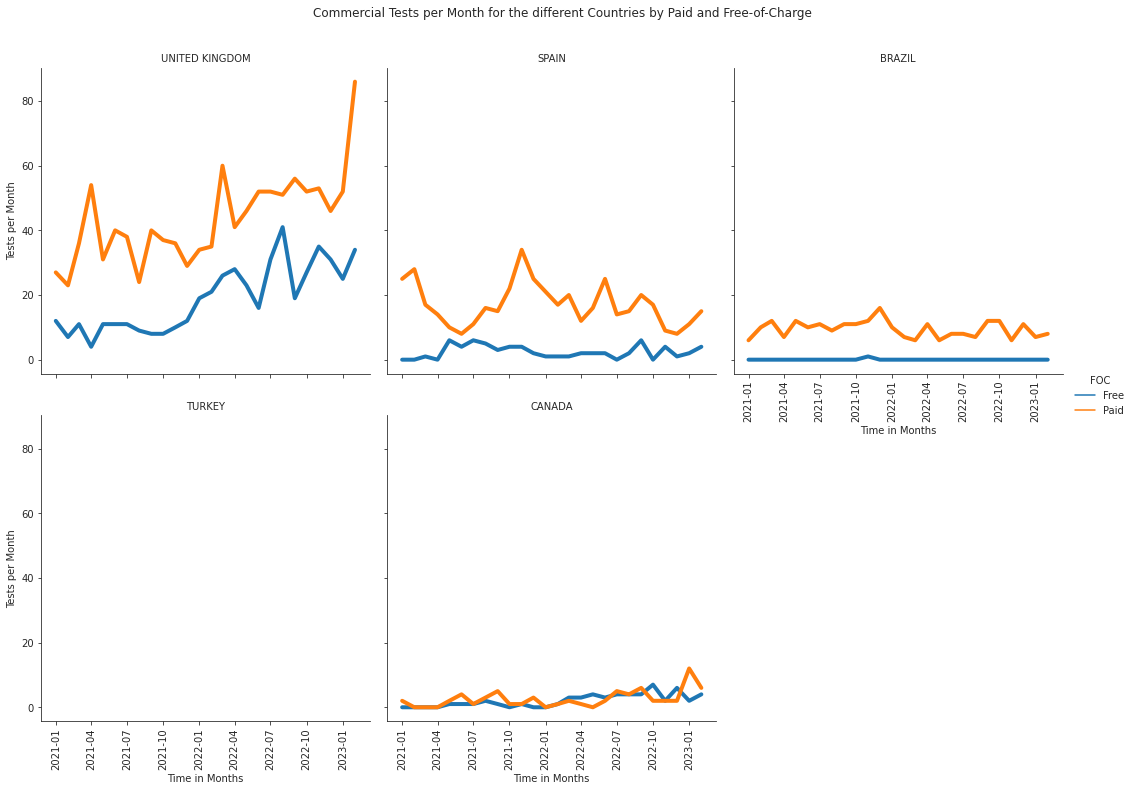

In [90]:


#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = FOC_df, x = "Year_Month", y = "Sales", kind = "line", hue = "FOC", col = "Reporting Country", color = "#7851a9", linewidth=4 , ci = None, col_wrap = 3
                ,col_order = country_list
                )
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Commercial Tests per Month for the different Countries by Paid and Free-of-Charge', y=1.05)

#plt.savefig("free_by_country.pdf", dpi = 300, bbox_inches ="tight",pad_inches = 1)
#files.download("free_by_country.pdf")

# using padding

plt.show()


In [91]:
#Total sales
all_countries_comm = FOC_df.groupby(['Year_Month', "FOC"]).sum().reset_index()
#all_countries_comm.tail(10)

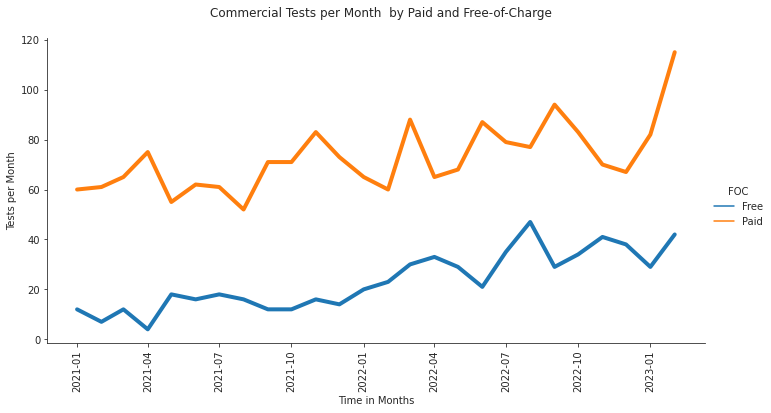

In [92]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = all_countries_comm , x = "Year_Month", y = "Sales", kind = "line", hue = "FOC",  color = "#7851a9", linewidth=4 , 
                ci = None, height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Commercial Tests per Month  by Paid and Free-of-Charge", y=1.05)

#plt.savefig('comm_all.pdf', dpi = 300, bbox_inches ="tight",
            #pad_inches = 1)
#files.download("comm_all.pdf")
plt.show()

In [93]:
#All Commercial cases including free
all_countries_incl_free = commercial_sales_FOC_analysis_df.groupby(['Year_Month']).sum().reset_index()
all_countries_incl_free.head()

,Year_Month,Sales
0,2021-01-01,72
1,2021-02-01,68
2,2021-03-01,77
3,2021-04-01,79
4,2021-05-01,73


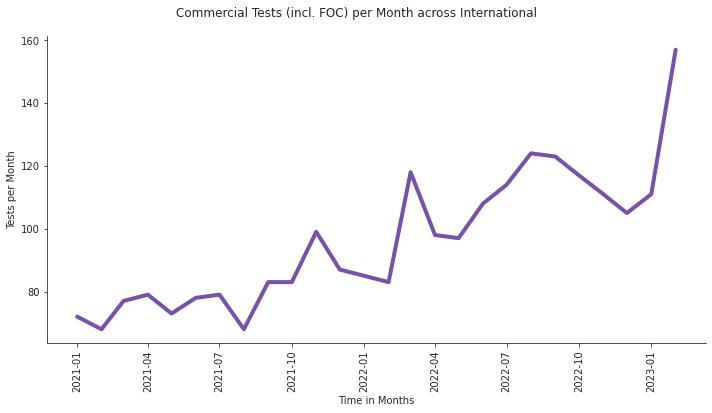

In [94]:
##Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = all_countries_incl_free  , x = "Year_Month", y = "Sales", kind = "line",  color = "#7851a9", linewidth=4 , 
                ci = None, height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Commercial Tests (incl. FOC) per Month across International", y=1.05)

#plt.savefig('comm_all_with_FOC.pdf', dpi = 300, bbox_inches ="tight",
            #pad_inches = 1)
#files.download("comm_all_with_FOC.pdf")
plt.show()

# Percentages growth

In [95]:
#Creat a data set with the monthly revenue for all countries, Calcualte the percent growth by using the percent_change function
commercial_percent = commercial_sales_FOC_analysis_df.groupby(["Year_Month"]).sum().reset_index().set_index("Year_Month")

In [96]:
commercial_percent["Annual_Growth(%)"] = commercial_percent.pct_change(periods = 12).mul(100)

In [97]:
#commercial_sales_rolling_df

# Charts for Rev Core

In [98]:
#Chart 1

In [99]:
all_samples.reset_index()

,Date Received,Accession #,Reporting Country,Cancer Type,Sales,Year_Month,Sub_region,AE_supported,Currency,Type,Month,Quarter,Year,LIMS Project ID
0,2022-09-29,A0584400,SPAIN,NaN,1,2022-09-01,Europe,AE,EUR,Commercial,9,3,2022,GHI_19
1,2022-09-16,A0577992,SPAIN,GI,1,2022-09-01,Europe,AE,EUR,Commercial,9,3,2022,GHI_19
2,2022-10-28,A0603771,CANADA,NaN,1,2022-10-01,Americas,AE,USD,Biopharma,10,4,2022,AZN_33
3,2022-12-03,A0625094,CANADA,NaN,1,2022-12-01,Americas,AE,USD,Biopharma,12,4,2022,AZN_33
4,2022-11-02,A0606045,CANADA,NaN,1,2022-11-01,Americas,AE,USD,Biopharma,11,4,2022,AZN_33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,2022-03-16,A0483299,CANADA,NaN,1,2022-03-01,Americas,AE,USD,Commercial,3,1,2022,GHI_01
10171,2021-09-02,A0394385,CANADA,Soft Tissue/Bone,1,2021-09-01,Americas,AE,USD,Commercial,9,3,2021,GHI_01
10172,2022-11-29,A0621361,CANADA,NaN,1,2022-11-01,Americas,AE,USD,Commercial,11,4,2022,GHI_01
10173,2023-01-03,A0640197,CANADA,NaN,1,2023-01-01,Americas,AE,USD,Commercial,1,1,2023,GHI_01


In [100]:
all_samples.groupby(["Year_Month", "Sub_region", "Type"])["Sales"].sum().reset_index().tail(10)

,Year_Month,Sub_region,Type,Sales
172,2023-01-01,Europe,Commercial,99
173,2023-01-01,Europe,GAP,10
174,2023-01-01,Europe,ISTs,97
175,2023-02-01,Americas,Biopharma,10
176,2023-02-01,Americas,Commercial,21
177,2023-02-01,Americas,ISTs,12
178,2023-02-01,Europe,Biopharma,292
179,2023-02-01,Europe,Commercial,142
180,2023-02-01,Europe,GAP,14
181,2023-02-01,Europe,ISTs,109


In [101]:
# Figure out the commercial volume by region in October 2022

In [102]:
#df_merged_time_horizon.groupby(["Year_Month", "Sub_region"])["Sales"].sum().reset_index()

In [103]:
top_commercial_countries = top_comm_x_sales.groupby(["Year_Month", "Reporting Country"])["Sales"].sum().reset_index()
#top_commercial_countries.head()

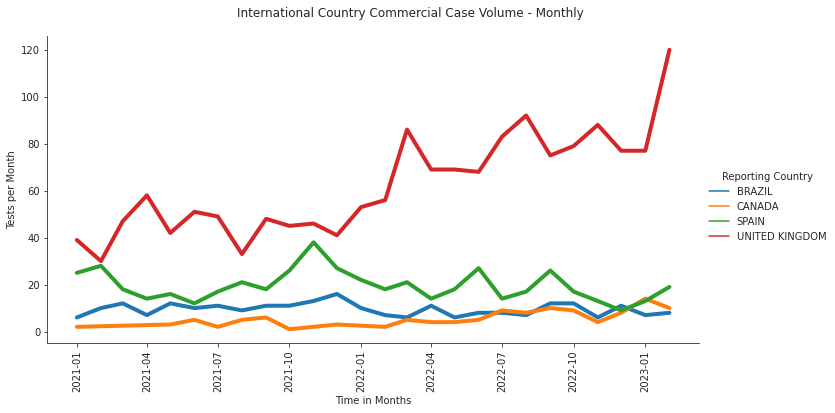

In [104]:
#sns.set_style("whitegrid")
with mpl.rc_context({'axes.grid': False}):
  g = sns.relplot(data = top_commercial_countries  , x = "Year_Month", y = "Sales", hue = "Reporting Country", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5)

g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"International Country Commercial Case Volume - Monthly", y=1.05)

#plt.savefig('comm_all_with_FOC.pdf', dpi = 300, bbox_inches ="tight",
            #pad_inches = 1)
#files.download("comm_all_with_FOC.pdf")

plt.show()

# Revenue Analysis

In [105]:
#Create the data farme that will be used for revenue analysis
revenue_start = df_merged_time_horizon.copy()
revenue_start["Invoiced Ammount"] = revenue_start["Invoiced Ammount"].astype("string")

In [106]:
revenue_start.index.max()

Timestamp('2023-02-28 00:00:00')

In [107]:
#revenue_start["Revenue(Local_Curr)"] = revenue_start["Invoiced Ammount"].str.extract('(\d+,?.?\d*)')

In [108]:
#revenue_start["Test"] = revenue_start["Invoiced Ammount"].str.extract('(\d+,?.?\d*)')

In [109]:
#revenue_start.tail(15)

In [110]:
revenue_start["Revenue(Local_Curr)"] = revenue_start["Invoiced Ammount"].str.extract('(\d+,?\d*)')
revenue_start["Revenue(Local_Curr)"] = revenue_start["Revenue(Local_Curr)"].fillna("0")
revenue_start["Revenue(Local_Curr)"] = revenue_start["Revenue(Local_Curr)"].str.replace(",","")
revenue_start["Revenue(Local_Curr)"] = revenue_start["Revenue(Local_Curr)"].astype(float)

In [111]:
revenue_start.index.max()

Timestamp('2023-02-28 00:00:00')

In [112]:
lookup_currency["Date"] = lookup_currency.index.to_numpy().astype('datetime64[M]').astype(str)
lookup_currency_wide = lookup_currency
lookup_currency_wide.tail(3)



,EUR,GBP,old,Unnamed: 4,USD,Date
Month,,,,,,
2022-12-01,0.94,1.22,2022-12-22,NaN,1,2022-12
2023-01-01,1.08,1.23,2023-01-21,NaN,1,2023-01
2023-02-01,1.07,1.21,2023-02-21,NaN,1,2023-02


In [113]:
lookup_currency_wide.index.max()

Timestamp('2023-02-01 00:00:00')

In [114]:
lookup_currency_long = lookup_currency_wide.melt(id_vars = ["Date"], value_vars = ["EUR", "GBP", "USD"], var_name = "Currency", value_name = "Value")
#lookup_currency.tail(3)


In [115]:
lookup_currency_long

,Date,Currency,Value
0,2015-08,EUR,1.11
1,2015-09,EUR,1.12
2,2015-10,EUR,1.12
3,2015-11,EUR,1.07
4,2015-12,EUR,1.09
...,...,...,...
268,2022-10,USD,1.00
269,2022-11,USD,1.00
270,2022-12,USD,1.00
271,2023-01,USD,1.00


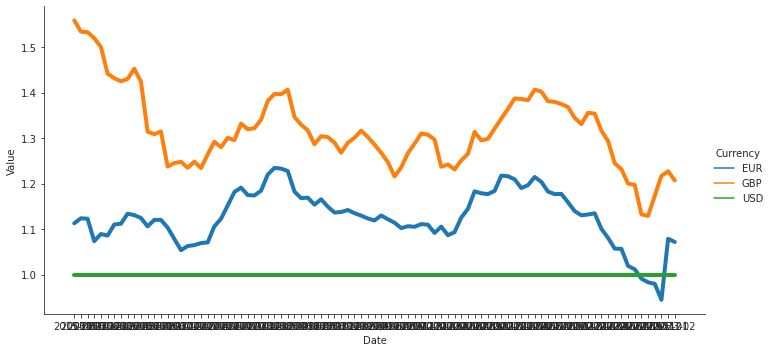

In [116]:
#Helper plot to understand if their are iutliers in the currency data
#lookup_currency_long.plot(x = "Date", y = "Value", hue = "Currency")
sns.relplot(data = lookup_currency_long , x = "Date", y = "Value", hue = "Currency", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5)


In [117]:
# Create a string based column that can be used to lookup a columnb value in other table - Specifically the month_year date
revenue_start["Month_to_match"] = revenue_start["Year_Month"].dt.to_period('M').astype(str)
#revenue_start["Month_to_match"].astype(str).unique().tolist()

# Create a string based column that can be used to lookup a column value in other table - Specifically the currency

In [118]:
lookup_currency_long.sample(3)


,Date,Currency,Value
36,2018-08,EUR,1.15
242,2020-08,USD,1.00
16,2016-12,EUR,1.05


In [119]:
revenue = revenue_start.merge(lookup_currency_long, left_on = ["Month_to_match", "Currency"], right_on = ["Date", "Currency"])
revenue.shape

(2804, 26)

In [120]:
revenue["Revenue (USD)"] = revenue["Revenue(Local_Curr)"]*revenue["Value"]

In [121]:
#revenue[(revenue["Revenue(Local_Curr)"] > 0) & (revenue["Revenue(Local_Curr)"] < 1000)]

In [122]:
revenue.index.max()

2803

In [123]:
revenue.head(2)

,Accession #,Reporting Country,Account: Reporting Country,Billing Type,Account: Account Name,Contact: Full Name,Final Report Date,Test Ordered,Cancer Type,LIMS Project ID,Type,Product,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Year_Month,Month_to_match,FOC,Invoiced Ammount,Revenue(Local_Curr),Date,Value,Revenue (USD)
0,A0584400,SPAIN,ES,Self-Pay Patient,Instituto de Investigacion Sanitaria INCLIVA,Noelia Tarazona Llavero,10/15/2022,Guardant 360,NaN,GHI_19,Commercial,1,AE,EUR,Europe,9,2022,3,1,2022-09-01,2022-09,Free,0 EUR,0.0,2022-09,0.99,0.0
1,A0577992,SPAIN,ES,Self-Pay Patient,Instituto de Investigacion Sanitaria INCLIVA,Noelia Tarazona Llavero,9/22/2022,Guardant 360,GI,GHI_19,Commercial,1,AE,EUR,Europe,9,2022,3,1,2022-09-01,2022-09,Free,0 EUR,0.0,2022-09,0.99,0.0


In [124]:
revenue.index.max()

2803

In [125]:
revenue["Revenue (USD)"].sort_values()

0          0.00
1280       0.00
1279       0.00
1277       0.00
1275       0.00
         ...   
83      4120.75
60      4120.75
661     4239.13
660     4239.13
1162    4282.49
Name: Revenue (USD), Length: 2804, dtype: float64

In [126]:
# Calcualte the ARC for paid cases and free of charge

In [127]:
revenue_month = revenue.groupby(["Month_to_match"])["Revenue (USD)"].sum().reset_index()
revenue_month.head()

,Month_to_match,Revenue (USD)
0,2021-01,189677.19
1,2021-02,179283.65
2,2021-03,170953.68
3,2021-04,183201.21
4,2021-05,128438.97


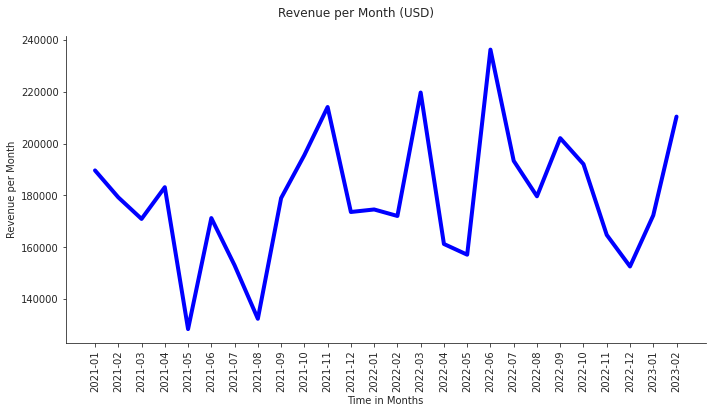

In [128]:
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = revenue_month , x = "Month_to_match", y = "Revenue (USD)", kind = "line",
                linewidth=4 , ci = None, height=5,color = "blue", aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Revenue per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Revenue per Month (USD)', y=1.05)

#plt.savefig('revenue_month.pdf', dpi = 300, bbox_inches ="tight",pad_inches = 1)
#files.download("revenue_month.pdf")
plt.show()

In [129]:
revenue.shape

(2804, 27)

#### Quick calculations

In [130]:
all_samples.shape

(10175, 13)

In [131]:
all_samples.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10175 entries, 2022-09-29 to 2023-01-17
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Accession #        10175 non-null  object        
 1   Reporting Country  10175 non-null  object        
 2   Cancer Type        4265 non-null   object        
 3   Sales              10175 non-null  int64         
 4   Year_Month         10175 non-null  datetime64[ns]
 5   Sub_region         10175 non-null  object        
 6   AE_supported       10175 non-null  object        
 7   Currency           10175 non-null  object        
 8   Type               10157 non-null  object        
 9   Month              10175 non-null  int64         
 10  Quarter            10175 non-null  int64         
 11  Year               10175 non-null  int64         
 12  LIMS Project ID    10175 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(8)
me

In [132]:
all_samples.groupby(["Month", "Reporting Country"])["Sales"].sum()

Month  Reporting Country
1      ARGENTINA              1
       AUSTRIA                9
       BELGIUM               20
       BRAZIL                34
       CANADA                74
                           ... 
12     PORTUGAL               5
       SPAIN                166
       SWITZERLAND            3
       UKRAINE                4
       UNITED KINGDOM       203
Name: Sales, Length: 235, dtype: int64

In [133]:
### Qucik and dirty


commercial_sales_FOC_analysis_df.shape

(2497, 5)

In [134]:
#Calculate the revenue growth rate

revenue.groupby("Year")["Revenue (USD)"].sum()

Year
2021    2.07e+06
2022    2.21e+06
2023    3.83e+05
Name: Revenue (USD), dtype: float64

In [135]:
2.51/2.24

1.1205357142857142

In [136]:
revenue_month.tail(12)

,Month_to_match,Revenue (USD)
14,2022-03,219733.25
15,2022-04,161286.83
16,2022-05,157149.37
17,2022-06,236299.38
18,2022-07,193382.89
19,2022-08,179692.26
20,2022-09,202138.48
21,2022-10,192095.81
22,2022-11,164781.55
23,2022-12,152609.11


In [137]:
#Calculate the annual revenue in 2022
revenue.groupby(["Year"])["Revenue (USD)", "Sales"].sum().reset_index()

,Year,Revenue (USD),Sales
0,2021,2.07e+06,1110
1,2022,2.21e+06,1416
2,2023,3.83e+05,278


In [138]:
revenue_month.head()

,Month_to_match,Revenue (USD)
0,2021-01,189677.19
1,2021-02,179283.65
2,2021-03,170953.68
3,2021-04,183201.21
4,2021-05,128438.97


### Average Revenue per Case

In [139]:
revenue_ARC = revenue.groupby(["Month_to_match"])["Revenue (USD)", "Sales"].sum().reset_index()
revenue_ARC["ARC"] = revenue_ARC["Revenue (USD)"]/revenue_ARC["Sales"]
revenue_ARC.tail(5)

,Month_to_match,Revenue (USD),Sales,ARC
21,2022-10,192095.81,133,1444.33
22,2022-11,164781.55,123,1339.69
23,2022-12,152609.11,114,1338.68
24,2023-01,172334.43,118,1460.46
25,2023-02,210443.56,160,1315.27


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

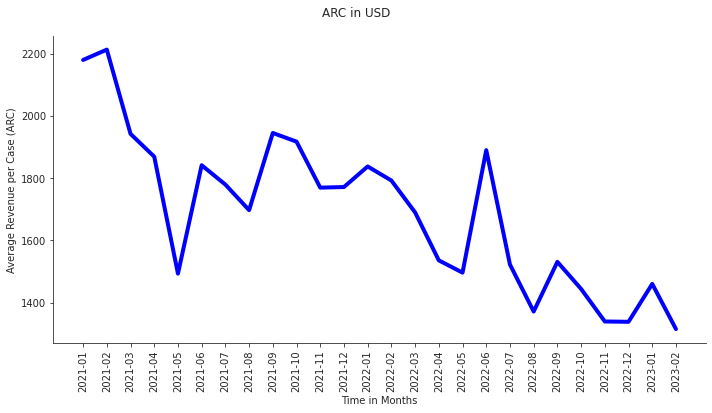

In [140]:
with mpl.rc_context({'axes.grid': False}): 

  g = sns.relplot(data = revenue_ARC , x = "Month_to_match", y = "ARC", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5, color = "blue")
g.set_xticklabels(rotation = "90")

g.set_ylabels("Average Revenue per Case (ARC)")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('ARC in USD', y=1.05)

plt.savefig('ARC.pdf', dpi = 300, bbox_inches ="tight",pad_inches = 1)
files.download('ARC.pdf')
plt.show()

In [141]:
#Calculate the ARC only for paid cases
revenue.shape

(2804, 27)

In [142]:
#Select only the paid cases
revenue_paid = revenue[revenue["FOC"] == "Paid"]


In [143]:
revenue_paid_local = revenue_paid.groupby(["Month_to_match"])["Revenue(Local_Curr)", "Sales"].sum().reset_index()
revenue_paid_local["ARC"] = revenue_paid_local["Revenue(Local_Curr)"]/revenue_paid_local["Sales"]
#revenue_paid_local.head(20)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

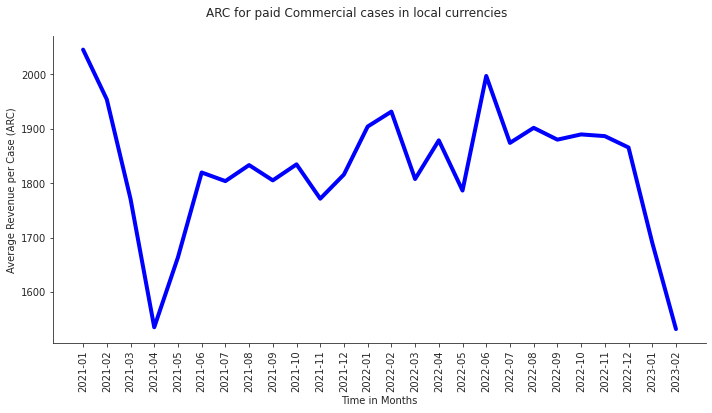

In [144]:
#Plot ARC in local currency
with mpl.rc_context({'axes.grid': False}): 

  g = sns.relplot(data = revenue_paid_local , x = "Month_to_match", y = "ARC", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5, color = "blue")
g.set_xticklabels(rotation = "90")

g.set_ylabels("Average Revenue per Case (ARC)")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('ARC for paid Commercial cases in local currencies', y=1.05)

plt.savefig('local_ARC.pdf', dpi = 300, bbox_inches ="tight",pad_inches = 1)
files.download('local_ARC.pdf')
plt.show()

In [145]:
revenue_paid["Reporting Country"]

2         SPAIN
3         SPAIN
4       GERMANY
5       GERMANY
6         SPAIN
         ...   
2798     BRAZIL
2799     BRAZIL
2800     BRAZIL
2801     BRAZIL
2803     CANADA
Name: Reporting Country, Length: 2154, dtype: object

In [146]:
#UK ARC plot
UK_revenue = revenue_paid[revenue_paid["Reporting Country"] == "UNITED KINGDOM"]

In [147]:
UK_rev_local = UK_revenue.groupby(["Month_to_match"])["Revenue(Local_Curr)", "Sales"].sum().reset_index()
UK_rev_local["ARC"] = UK_rev_local["Revenue(Local_Curr)"]/UK_rev_local["Sales"]

In [148]:
UK_revenue.tail(2)

,Accession #,Reporting Country,Account: Reporting Country,Billing Type,Account: Account Name,Contact: Full Name,Final Report Date,Test Ordered,Cancer Type,LIMS Project ID,Type,Product,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Year_Month,Month_to_match,FOC,Invoiced Ammount,Revenue(Local_Curr),Date,Value,Revenue (USD)
2398,A0351995,UNITED KINGDOM,GB,Self-Pay Patient,Genesis Care,Riyaz Shah,5/5/2021,Guardant 360,NaN,GHI_01,Commercial,1,AE,GBP,Europe,5,2021,2,1,2021-05-01,2021-05,Paid,"GBP 2,300.00",2300.0,2021-05,1.41,3235.05
2399,A0358553,UNITED KINGDOM,GB,Self-Pay Patient,Genesis Care,Timothy Sevitt,5/31/2021,Guardant 360,NaN,GHI_01,Commercial,1,AE,GBP,Europe,5,2021,2,1,2021-05-01,2021-05,Paid,"GBP 1,245.00",1245.0,2021-05,1.41,1751.15


In [149]:
revenue_paid.head(2)

,Accession #,Reporting Country,Account: Reporting Country,Billing Type,Account: Account Name,Contact: Full Name,Final Report Date,Test Ordered,Cancer Type,LIMS Project ID,Type,Product,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Year_Month,Month_to_match,FOC,Invoiced Ammount,Revenue(Local_Curr),Date,Value,Revenue (USD)
2,A0574980,SPAIN,ES,Distributors : ROW,Hospital Universitario HM Sanchinarro,Laura Rodriguez,9/19/2022,Guardant 360,NaN,GHI_19,Commercial,1,AE,EUR,Europe,9,2022,3,1,2022-09-01,2022-09,Paid,2500 USD,2500.0,2022-09,0.99,2478.25
3,A0577288,SPAIN,ES,Self-Pay Patient,Hospital Quiron Barcelona,Elvira Buxo Orra,9/28/2022,Guardant 360,NaN,GHI_19,Commercial,1,AE,EUR,Europe,9,2022,3,1,2022-09-01,2022-09,Paid,2241 EUR,2241.0,2022-09,0.99,2221.50


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

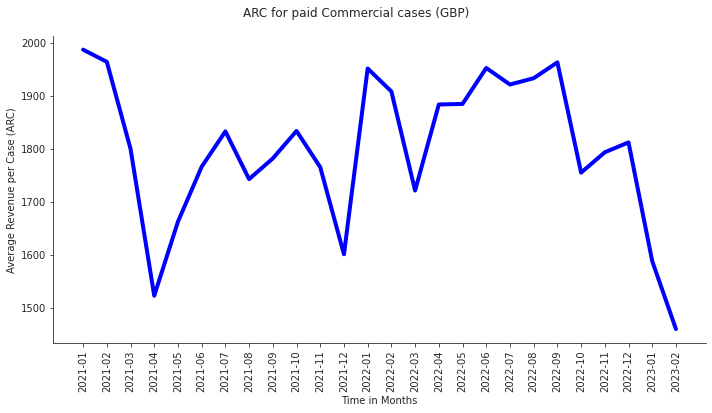

In [150]:
with mpl.rc_context({'axes.grid': False}): 

  g = sns.relplot(data = UK_rev_local , x = "Month_to_match", y = "ARC", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5, color = "blue")
g.set_xticklabels(rotation = "90")

g.set_ylabels("Average Revenue per Case (ARC)")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('ARC for paid Commercial cases (GBP)', y=1.05)

plt.savefig('ARC.pdf', dpi = 300, bbox_inches ="tight",pad_inches = 1)
files.download('ARC.pdf')
plt.show()

In [151]:
#ARC in local currency

revenue_paid = revenue_paid.groupby(["Month_to_match"])["Revenue (USD)", "Sales"].sum().reset_index()
revenue_paid["ARC"] = revenue_paid["Revenue (USD)"]/revenue_paid["Sales"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

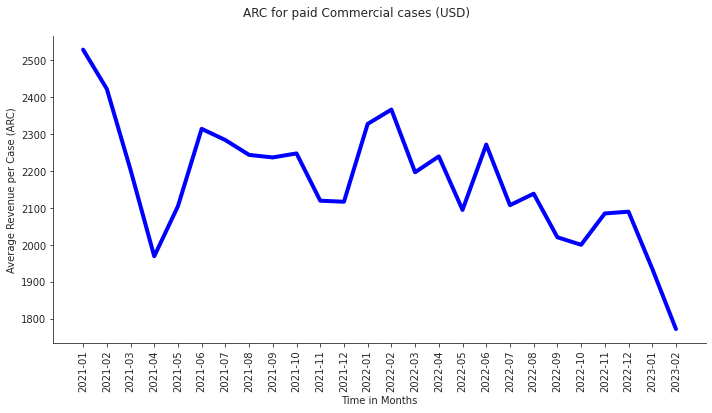

In [152]:
with mpl.rc_context({'axes.grid': False}): 

  g = sns.relplot(data = revenue_paid , x = "Month_to_match", y = "ARC", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5, color = "blue")
g.set_xticklabels(rotation = "90")

g.set_ylabels("Average Revenue per Case (ARC)")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('ARC for paid Commercial cases (USD)', y=1.05)

plt.savefig('ARC.pdf', dpi = 300, bbox_inches ="tight",pad_inches = 1)
files.download('ARC.pdf')
plt.show()

In [153]:
#Select the time horizion to analyse
start_date_ARC = "2020-07-01"
end_date_ARC = "2020-07-31"
#Select the # of countries to be analyses based on the maxiumum number of samplesin 

revenue = revenue.set_index("Year_Month").sort_index()
#Create the dataframe relevant for the time periode which should be analysed
revenue_search = revenue.loc[start_date_ARC:end_date_ARC].copy()

In [154]:
revenue_search["Revenue (USD)"].max()

nan

In [155]:
revenue_search[75:]

,Accession #,Reporting Country,Account: Reporting Country,Billing Type,Account: Account Name,Contact: Full Name,Final Report Date,Test Ordered,Cancer Type,LIMS Project ID,Type,Product,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Month_to_match,FOC,Invoiced Ammount,Revenue(Local_Curr),Date,Value,Revenue (USD)
Year_Month,,,,,,,,,,,,,,,,,,,,,,,,,,


In [156]:
Q4 = revenue.groupby(["Year", "Quarter", "Reporting Country"])["Sales"].sum()

In [157]:
#This is the startimg point for the analysis of the new customer conversion rate

# Select a time periode _ e.g. 6 months window/lag
# identify the clinicians in the next three month that have not ordered before - Create two list and use set on them
#Take the list of names and count how often each name has ordered three or more times - It is important to identify the time point where the customer ordered the first time



revenue.info()
revenue.to_csv("revenue.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2804 entries, 2021-01-01 to 2023-02-01
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Accession #                 2804 non-null   object  
 1   Reporting Country           2804 non-null   object  
 2   Account: Reporting Country  2804 non-null   object  
 3   Billing Type                2804 non-null   object  
 4   Account: Account Name       2804 non-null   object  
 5   Contact: Full Name          2804 non-null   object  
 6   Final Report Date           2789 non-null   object  
 7   Test Ordered                2804 non-null   object  
 8   Cancer Type                 910 non-null    object  
 9   LIMS Project ID             2804 non-null   object  
 10  Type                        2801 non-null   category
 11  Product                     2804 non-null   int64   
 12  AE_supported                2804 non-null   object  
 13  

In [158]:
revenue["Test Ordered"].value_counts()

Guardant 360          2627
Guardant360 CDx EU      76
Guardant360 CDx         62
Guardant Reveal         30
74-Gene Panel            6
UNKNOWN                  2
83-Gene Panel            1
Name: Test Ordered, dtype: int64

In [159]:
revenue.groupby(["Year"])["Revenue (USD)"].sum()

Year
2021    2.07e+06
2022    2.21e+06
2023    3.83e+05
Name: Revenue (USD), dtype: float64

In [160]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2804 entries, 2021-01-01 to 2023-02-01
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Accession #                 2804 non-null   object  
 1   Reporting Country           2804 non-null   object  
 2   Account: Reporting Country  2804 non-null   object  
 3   Billing Type                2804 non-null   object  
 4   Account: Account Name       2804 non-null   object  
 5   Contact: Full Name          2804 non-null   object  
 6   Final Report Date           2789 non-null   object  
 7   Test Ordered                2804 non-null   object  
 8   Cancer Type                 910 non-null    object  
 9   LIMS Project ID             2804 non-null   object  
 10  Type                        2801 non-null   category
 11  Product                     2804 non-null   int64   
 12  AE_supported                2804 non-null   object  
 13  

In [161]:
revenue.groupby(["Year", "Reporting Country"])["Revenue (USD)"].sum()

Year  Reporting Country
2021  ARGENTINA            4.00e+03
      AUSTRIA              1.13e+04
      BELGIUM              3.58e+03
      BRAZIL               1.74e+05
      CANADA               5.12e+04
      CHILE                2.34e+04
      COLOMBIA             1.26e+04
      COSTA RICA           2.50e+03
      FINLAND              6.81e+04
      FRANCE               4.78e+03
      GERMANY              6.03e+04
      GREECE               5.87e+03
      IRELAND              4.39e+04
      ITALY                8.93e+03
      MEXICO               6.87e+04
      PERU                 2.50e+03
      POLAND               6.96e+03
      SLOVENIA             6.13e+03
      SPAIN                5.06e+05
      SWITZERLAND          0.00e+00
      UNITED KINGDOM       1.01e+06
2022  ARGENTINA            6.45e+03
      AUSTRIA              3.95e+03
      BELGIUM              0.00e+00
      BRAZIL               1.62e+05
      CANADA               4.60e+04
      CHILE                1.24e+04
    

In [162]:
test_b = revenue.groupby(["Quarter", "Test Ordered"])["Sales"].sum().reset_index()
test_b 


,Quarter,Test Ordered,Sales
0,1,74-Gene Panel,4
1,1,83-Gene Panel,1
2,1,Guardant 360,788
3,1,Guardant Reveal,12
4,1,Guardant360 CDx,39
5,1,Guardant360 CDx EU,10
6,1,UNKNOWN,1
7,2,Guardant 360,609
8,2,Guardant Reveal,1
9,2,Guardant360 CDx,1


### Stop

#### Temp Analysis

In [163]:
all_samples.shape

(10175, 13)

In [164]:
commercial = all_samples[all_samples["Type"] == "Commercial"]

In [165]:
commercial.head()

,Accession #,Reporting Country,Cancer Type,Sales,Year_Month,Sub_region,AE_supported,Currency,Type,Month,Quarter,Year,LIMS Project ID
Date Received,,,,,,,,,,,,,
2022-09-29,A0584400,SPAIN,NaN,1,2022-09-01,Europe,AE,EUR,Commercial,9,3,2022,GHI_19
2022-09-16,A0577992,SPAIN,GI,1,2022-09-01,Europe,AE,EUR,Commercial,9,3,2022,GHI_19
2021-03-04,A0333787,SPAIN,NaN,1,2021-03-01,Europe,AE,EUR,Commercial,3,1,2021,GHI_01
2021-03-11,A0336558,SPAIN,NaN,1,2021-03-01,Europe,AE,EUR,Commercial,3,1,2021,GHI_01
2021-09-28,A0405577,SPAIN,GI,1,2021-09-01,Europe,AE,EUR,Commercial,9,3,2021,GHI_01


In [166]:
UK_commercial = commercial[commercial["Reporting Country"] == "UNITED KINGDOM"]

In [167]:
UK_commercial.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1626 entries, 2021-01-07 to 2022-12-23
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Accession #        1626 non-null   object        
 1   Reporting Country  1626 non-null   object        
 2   Cancer Type        561 non-null    object        
 3   Sales              1626 non-null   int64         
 4   Year_Month         1626 non-null   datetime64[ns]
 5   Sub_region         1626 non-null   object        
 6   AE_supported       1626 non-null   object        
 7   Currency           1626 non-null   object        
 8   Type               1626 non-null   object        
 9   Month              1626 non-null   int64         
 10  Quarter            1626 non-null   int64         
 11  Year               1626 non-null   int64         
 12  LIMS Project ID    1626 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(8)
mem

In [168]:
UK_commercial_2023 = UK_commercial.loc["2023-01-01": "2023-02-28"]

In [169]:
UK_commercial_2023.groupby(["Year_Month"])["LIMS Project ID"].value_counts()

Year_Month  LIMS Project ID
2023-01-01  GHI_19              70
            GHI_01               6
            GH2_12               2
            GHI_10               2
2023-02-01  GHI_19             113
            GHI_10               5
            GHI_01               2
            GH2_12               1
Name: LIMS Project ID, dtype: int64

In [170]:
df_merged.shape

(3883, 23)

In [171]:
all_samples.head()

,Accession #,Reporting Country,Cancer Type,Sales,Year_Month,Sub_region,AE_supported,Currency,Type,Month,Quarter,Year,LIMS Project ID
Date Received,,,,,,,,,,,,,
2022-09-29,A0584400,SPAIN,NaN,1,2022-09-01,Europe,AE,EUR,Commercial,9,3,2022,GHI_19
2022-09-16,A0577992,SPAIN,GI,1,2022-09-01,Europe,AE,EUR,Commercial,9,3,2022,GHI_19
2022-10-28,A0603771,CANADA,NaN,1,2022-10-01,Americas,AE,USD,Biopharma,10,4,2022,AZN_33
2022-12-03,A0625094,CANADA,NaN,1,2022-12-01,Americas,AE,USD,Biopharma,12,4,2022,AZN_33
2022-11-02,A0606045,CANADA,NaN,1,2022-11-01,Americas,AE,USD,Biopharma,11,4,2022,AZN_33


In [172]:
UK_all_samples = all_samples[all_samples["Reporting Country"] == "UNITED KINGDOM"]

In [173]:
UK_all_samples_2023 = UK_all_samples.loc["2023-01-01": "2023-02-28"] 

In [174]:
UK_all_samples_2023.groupby(["Month", "Type"])["Sales"].sum()

Month  Type      
1      Biopharma      22
       Commercial     80
       GAP             4
       ISTs           49
2      Biopharma      24
       Commercial    121
       GAP             5
       ISTs           56
Name: Sales, dtype: int64

#### UK revenue analysis

In [175]:
FOC_df

,Year_Month,Reporting Country,FOC,Sales
0,2021-01-01,BRAZIL,Free,0
1,2021-01-01,BRAZIL,Paid,6
2,2021-01-01,CANADA,Free,0
3,2021-01-01,CANADA,Paid,2
4,2021-01-01,SPAIN,Free,0
...,...,...,...,...
203,2023-02-01,CANADA,Paid,6
204,2023-02-01,SPAIN,Free,4
205,2023-02-01,SPAIN,Paid,15
206,2023-02-01,UNITED KINGDOM,Free,34


In [176]:
UK_FOC = FOC_df[FOC_df["Reporting Country"] == "UNITED KINGDOM"]

In [177]:
UK_FOC.groupby(["Year_Month","FOC"])["Sales"].sum()

Year_Month  FOC 
2021-01-01  Free    12
            Paid    27
2021-02-01  Free     7
            Paid    23
2021-03-01  Free    11
            Paid    36
2021-04-01  Free     4
            Paid    54
2021-05-01  Free    11
            Paid    31
2021-06-01  Free    11
            Paid    40
2021-07-01  Free    11
            Paid    38
2021-08-01  Free     9
            Paid    24
2021-09-01  Free     8
            Paid    40
2021-10-01  Free     8
            Paid    37
2021-11-01  Free    10
            Paid    36
2021-12-01  Free    12
            Paid    29
2022-01-01  Free    19
            Paid    34
2022-02-01  Free    21
            Paid    35
2022-03-01  Free    26
            Paid    60
2022-04-01  Free    28
            Paid    41
2022-05-01  Free    23
            Paid    46
2022-06-01  Free    16
            Paid    52
2022-07-01  Free    31
            Paid    52
2022-08-01  Free    41
            Paid    51
2022-09-01  Free    19
            Paid    56
2022-10-01  Free 

#### UK FOC Plot

In [178]:
UK_FOC_plot = FOC_df[FOC_df["Reporting Country"] == "UNITED KINGDOM"]

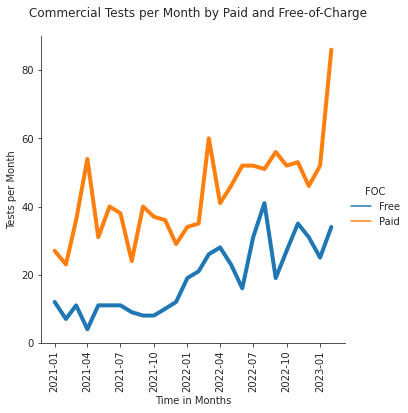

In [179]:

#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = UK_FOC_plot, x = "Year_Month", y = "Sales", kind = "line", hue = "FOC", color = "#7851a9", linewidth=4 , ci = None)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Commercial Tests per Month by Paid and Free-of-Charge', y=1.05)

#plt.savefig("free_by_country.pdf", dpi = 300, bbox_inches ="tight",pad_inches = 1)
#files.download("free_by_country.pdf")

# using padding

plt.show()

In [181]:
UK_revenue.head(2)

,Accession #,Reporting Country,Account: Reporting Country,Billing Type,Account: Account Name,Contact: Full Name,Final Report Date,Test Ordered,Cancer Type,LIMS Project ID,Type,Product,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Year_Month,Month_to_match,FOC,Invoiced Ammount,Revenue(Local_Curr),Date,Value,Revenue (USD)
760,A0318839,UNITED KINGDOM,GB,Self-Pay Patient,The Nuffield Hospital Guildford,Ajay Mehta,1/13/2021,Guardant 360,NaN,GHI_01,Commercial,1,AE,GBP,Europe,1,2021,1,1,2021-01-01,2021-01,Paid,1245.0,1245.0,2021-01,1.36,1698.23
761,A0317480,UNITED KINGDOM,GB,Self-Pay Patient,The Nuffield Hospital Guildford,Robert Laing,1/11/2021,Guardant 360,Breast,GHI_01,Commercial,1,AE,GBP,Europe,1,2021,1,1,2021-01-01,2021-01,Paid,2300.0,2300.0,2021-01,1.36,3137.29


<AxesSubplot:ylabel='Frequency'>

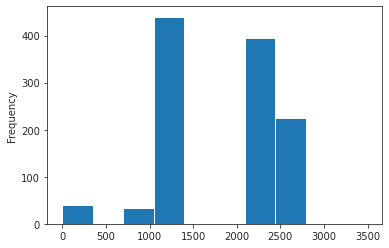

In [183]:
UK_revenue["Revenue(Local_Curr)"].plot(kind = "hist")

In [184]:
UK_revenue.shape[0]

1131

In [186]:
UK_revenue[UK_revenue["Revenue(Local_Curr)"] <500]

,Accession #,Reporting Country,Account: Reporting Country,Billing Type,Account: Account Name,Contact: Full Name,Final Report Date,Test Ordered,Cancer Type,LIMS Project ID,Type,Product,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Year_Month,Month_to_match,FOC,Invoiced Ammount,Revenue(Local_Curr),Date,Value,Revenue (USD)
836,A0382802,UNITED KINGDOM,GB,Self-Pay Sponsored,The Royal Marsden NHS Foundation Trust,Sanjay Popat,8/6/2021,Guardant 360,NaN,GHI_01,Commercial,1,AE,GBP,Europe,7,2021,3,1,2021-07-01,2021-07,Paid,<NA>,0.0,2021-07,1.38,0.0
859,A0450420,UNITED KINGDOM,GB,Do Not Bill - Cancelled,Royal United Hospitals Bath,Ashley Cox,1/4/2022,Guardant 360,NaN,GHI_01,Commercial,1,AE,GBP,Europe,12,2021,4,1,2021-12-01,2021-12,Paid,0 GBP,0.0,2021-12,1.33,0.0
874,A0449170,UNITED KINGDOM,GB,Do Not Bill - Cancelled,The Rutherford Cancer Centre,Jason Lester,12/29/2021,Guardant 360,NaN,GHI_01,Commercial,1,AE,GBP,Europe,12,2021,4,1,2021-12-01,2021-12,Paid,0 GBP,0.0,2021-12,1.33,0.0
878,A0446502,UNITED KINGDOM,GB,Do Not Bill - Cancelled,The Royal Marsden NHS Foundation Trust,Ian Smith,12/25/2021,Guardant 360,Breast,GHI_01,Commercial,1,AE,GBP,Europe,12,2021,4,1,2021-12-01,2021-12,Paid,0.0,0.0,2021-12,1.33,0.0
890,A0454238,UNITED KINGDOM,GB,Do Not Bill - Cancelled,The Nuffield Hospital Guildford,Sebastian Cummins,2/1/2022,Guardant 360,NaN,GHI_01,Commercial,1,AE,GBP,Europe,1,2022,1,1,2022-01-01,2022-01,Paid,0 GBP,0.0,2022-01,1.36,0.0
913,A0461649,UNITED KINGDOM,GB,Do Not Bill - Cancelled,HCA Laboratories,Carmel Coulter,2/8/2022,Guardant 360,Breast,GHI_01,Commercial,1,AE,GBP,Europe,1,2022,1,1,2022-01-01,2022-01,Paid,0 GBP,0.0,2022-01,1.36,0.0
944,A0472514,UNITED KINGDOM,GB,Do Not Bill - Cancelled,Castle Hill Hospital,Brendan Wooler,3/3/2022,Guardant 360,Breast,GHI_01,Commercial,1,AE,GBP,Europe,2,2022,1,1,2022-02-01,2022-02,Paid,0 GBP,0.0,2022-02,1.35,0.0
969,A0464873,UNITED KINGDOM,GB,Do Not Bill - Cancelled,HCA Laboratories,Khurum Khan,2/23/2022,Guardant 360,NaN,GHI_01,Commercial,1,AE,GBP,Europe,2,2022,1,1,2022-02-01,2022-02,Paid,0 GBP,0.0,2022-02,1.35,0.0
1084,A0588584,UNITED KINGDOM,GB,Do Not Bill - Cancelled,Oxford University Hospitals NHS Foundation Tru...,Shiroma De Silva-Minor,11/9/2022,Guardant 360,Breast,GHI_19,Commercial,1,AE,GBP,Europe,10,2022,4,1,2022-10-01,2022-10,Paid,0 GBP,0.0,2022-10,1.13,0.0
1101,A0586417,UNITED KINGDOM,GB,Do Not Bill - Cancelled,HCA Laboratories,Suzy Cleator,11/9/2022,Guardant 360,NaN,GHI_19,Commercial,1,AE,GBP,Europe,10,2022,4,1,2022-10-01,2022-10,Paid,0 GBP,0.0,2022-10,1.13,0.0
